In [143]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PlotFuncs import *
from LabFuncs import *
from Params import *
from HaloFuncs import *
from scipy.stats import norm
import pandas
import cmocean
from copy import copy


df = pandas.read_csv('../data/Gaia-SDSS.csv')
df_S = pandas.read_csv('../data/GAIA_SDSS_Shards_wActions.csv')
names = df_S.group_id.unique()

In [191]:
from sklearn.neighbors.kde import KernelDensity
from sklearn import preprocessing
bw = 0.02

def getkernelde(dfc,bw=0.02):
    JR = log10(dfc.JR.values)
    Jphi = dfc.Jphi.values
    Jz = log10(dfc.Jz.values)
    E = dfc.E.values/1.0e5
    #data = array([JR,Jphi,Jz,E]).T
    data = array([JR,Jphi,Jz,E]).T
    scale = preprocessing.MinMaxScaler()
    data_s = scale.fit_transform(data)
    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(data_s)
    L = kde.score_samples(data_s)
    L -= amax(L)
    isort = argsort(L)
    x = JR[isort]
    y = Jphi[isort]
    z = Jz[isort]
    eo = E[isort]
    L = L[isort]
    return x,y,z,eo,L

r0,p0,z0,eo0,L0 = getkernelde(df)

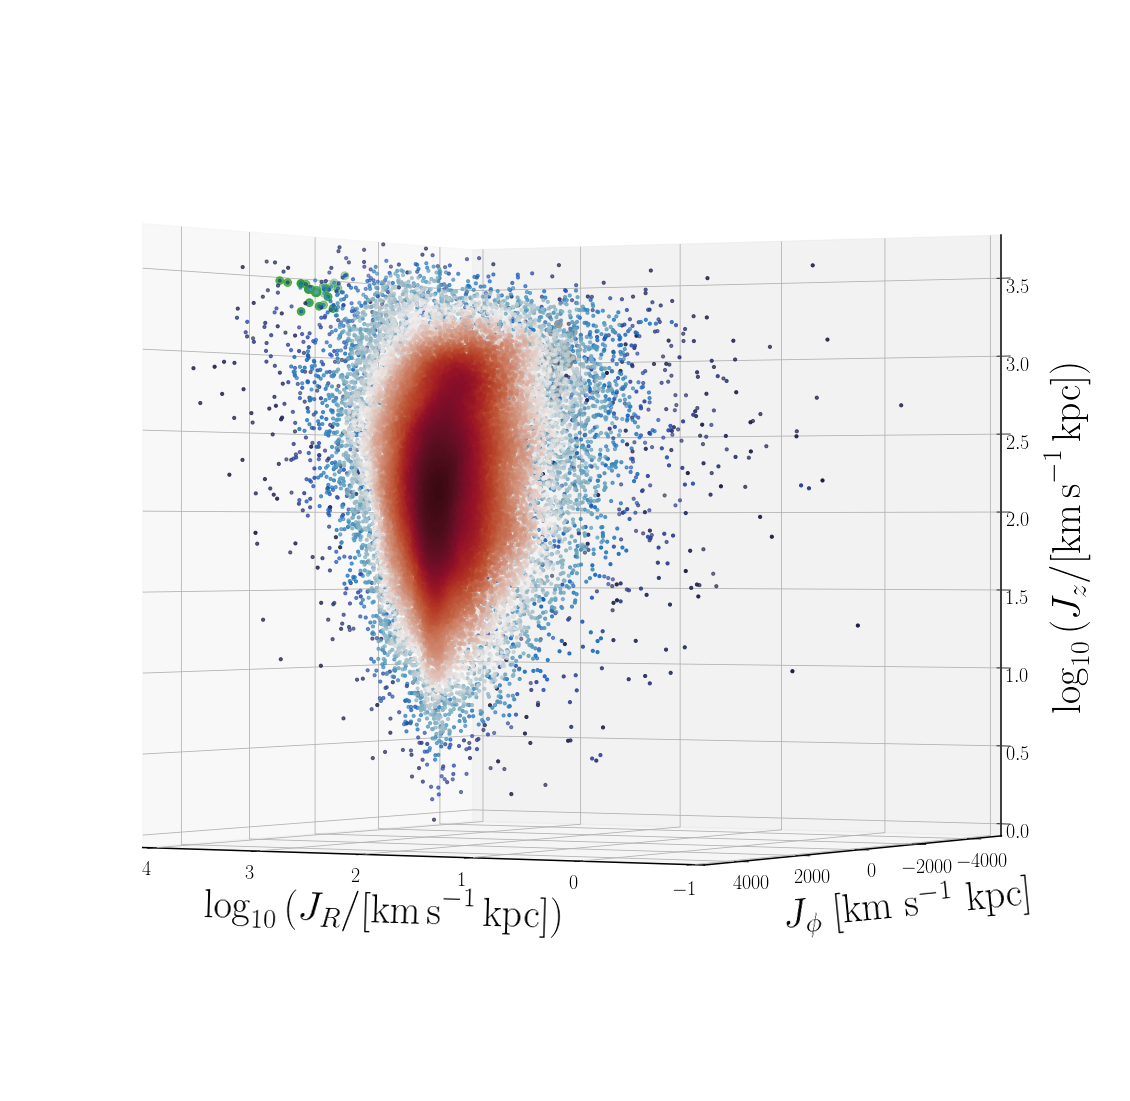

In [218]:
cmap = cmocean.cm.balance
rlab = r'$\log_{10}{(J_R/{\rm [km\,s}^{-1}\,{\rm kpc}])}$'
plab = r'$J_\phi$ [km s$^{-1}$ kpc]'
zlab = r'$\log_{10}{(J_z/{\rm [km\,s}^{-1}\,{\rm kpc}])}$'
Elab = r'$E$ [$10^5$ km$^2$ s$^{-2}$]'
jrmin = log10(0.1)
jrmax = log10(10000.0)
jpmin = -4900.0
jpmax = 4900.0
jzmin = log10(1.0)
jzmax = log10(5000.0)

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

plt.rcParams['axes.linewidth'] = 1.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=20)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')




j = 20000
ax.scatter(r0,p0,z0,s=10,c=L0,cmap=cmap)

for i in range(0,10):
    Cand = df_S.loc[df_S.group_id==names[i]]
    x = log10(Cand.JR)
    y = Cand.Jphi
    z = log10(Cand.Jz)
    ax.scatter(x,y,z,s=60,zorder=1000)


ax.set_xlabel(rlab,fontsize=40,labelpad=30)
ax.set_ylabel(plab,fontsize=40,labelpad=30)
ax.set_zlabel(zlab,fontsize=40,labelpad=30)

ax.set_xlim([jrmin,jrmax])
ax.set_ylim([jpmin,jpmax])
ax.set_zlim([jzmin,jzmax])
ax.view_init(elev=0., azim=120)
plt.show()

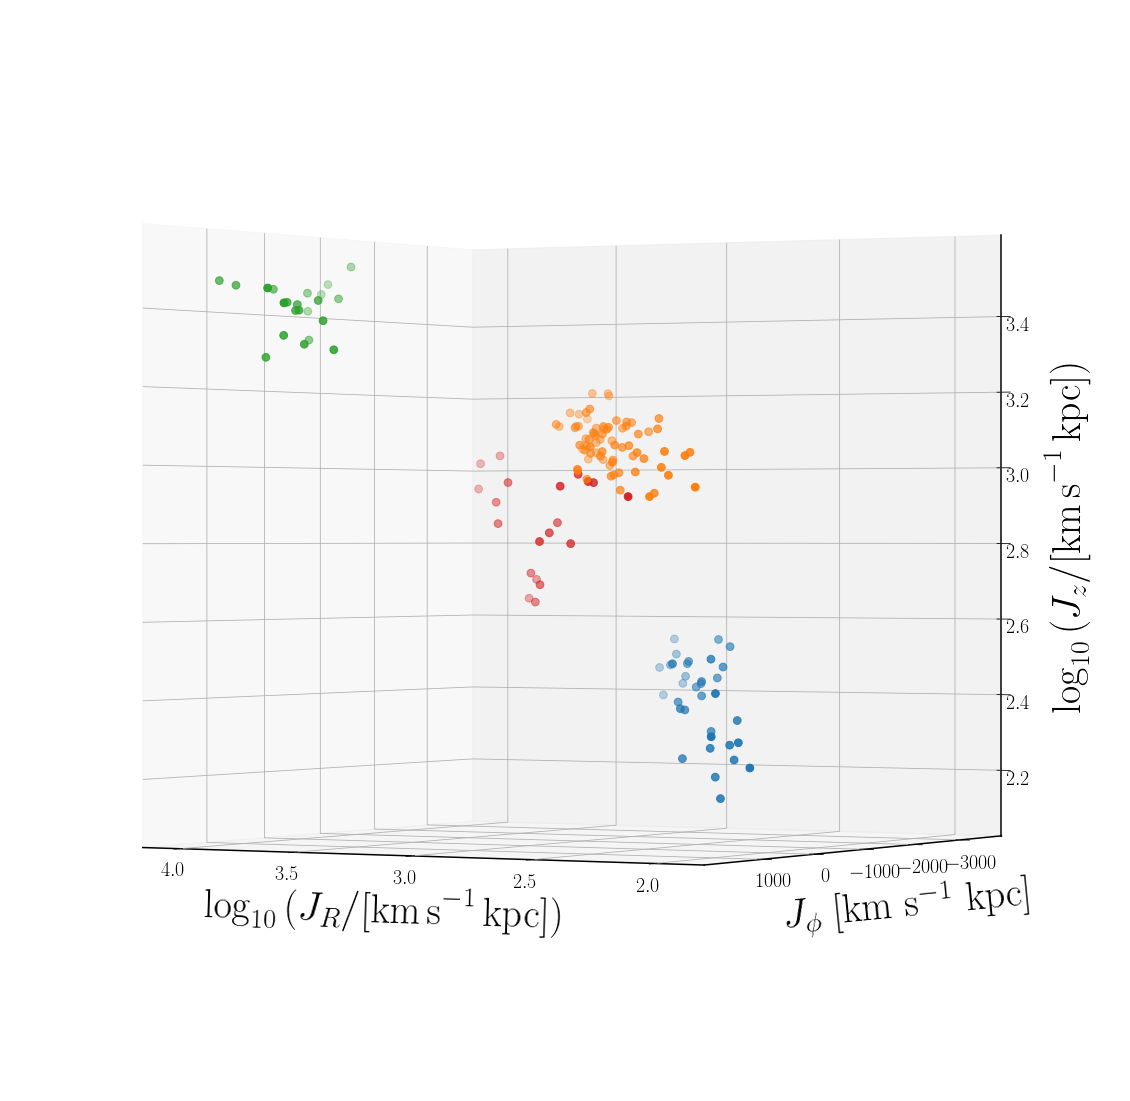

In [226]:
cmap = cmocean.cm.balance
rlab = r'$\log_{10}{(J_R/{\rm [km\,s}^{-1}\,{\rm kpc}])}$'
plab = r'$J_\phi$ [km s$^{-1}$ kpc]'
zlab = r'$\log_{10}{(J_z/{\rm [km\,s}^{-1}\,{\rm kpc}])}$'
Elab = r'$E$ [$10^5$ km$^2$ s$^{-2}$]'
jrmin = log10(0.1)
jrmax = log10(10000.0)
jpmin = -4900.0
jpmax = 4900.0
jzmin = log10(1.0)
jzmax = log10(5000.0)

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

plt.rcParams['axes.linewidth'] = 1.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=20)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

for i in range(0,4):
    Cand = df_S.loc[df_S.group_id==names[i]]
    x = log10(Cand.JR)
    y = Cand.Jphi
    z = log10(Cand.Jz)
    ax.scatter(x,y,z,s=60)


ax.set_xlabel(rlab,fontsize=40,labelpad=30)
ax.set_ylabel(plab,fontsize=40,labelpad=30)
ax.set_zlabel(zlab,fontsize=40,labelpad=30)

#ax.set_xlim([jrmin,jrmax])
#ax.set_ylim([jpmin,jpmax])
#ax.set_zlim([jzmin,jzmax])
ax.view_init(elev=0., azim=120)
plt.show()

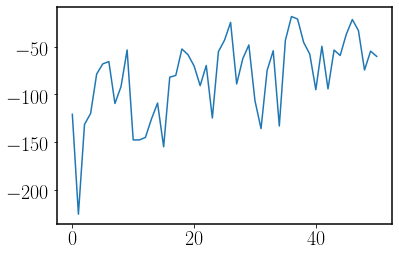

In [280]:
def datarescale(dfc,jb):
    data_sc = zeros(shape=(shape(dfc)[0],3))
    data_sc[:,0] = (log10(dfc.JR.values)-jb[0])/(jb[1]-jb[0])
    data_sc[:,1] = (dfc.Jphi.values-jb[2])/(jb[3]-jb[2])
    data_sc[:,2] = (log10(dfc.Jz.values)-jb[4])/(jb[5]-jb[4])
    #data_sc[:,3] = (dfc.E.values-jb[6])/(jb[7]-jb[6])
    return data_sc

df_sl = pandas.read_csv('../data/Gaia_SDSS_Shardsless.csv')

jb = array([1.0,4.0,-5000.0,5000.0,1.0,4.0])
data0 = datarescale(df_sl,jb)

nshards = size(names)
Li = zeros(shape=nshards)

for bw in array([0.1]):
    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(data0)
    for i in range(0,nshards):
        Cand = df_S.loc[df_S.group_id==names[i]]   
        #x = (Cand.JR)
        #y = Cand.Jphi
        #z = (Cand.Jz)
        data = datarescale(Cand,jb)
        kdeS = KernelDensity(kernel='gaussian', bandwidth=bw).fit(data)
        Li[i] = kde.score(data)-kdeS.score(data)
    plt.plot(Li,'-')

plt.show()


In [277]:
Cand = df_S.loc[df_S.group_id==names[0]]
data = datarescale(Cand,jb)
kdeS = KernelDensity(kernel='gaussian', bandwidth=bw).fit(data)
print(kde.score(data)-kdeS.score(data))

Cand = df_S.loc[df_S.group_id==names[10]]
data = datarescale(Cand,jb)
kdeS = KernelDensity(kernel='gaussian', bandwidth=bw).fit(data)
print(kde.score(data)-kdeS.score(data))

-29.030925142529448
-39.56727794803919


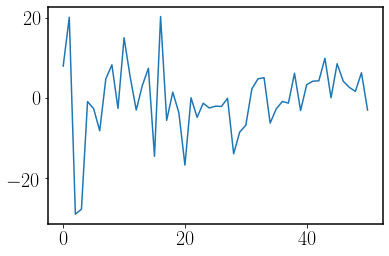

In [274]:
plt.plot(Li)

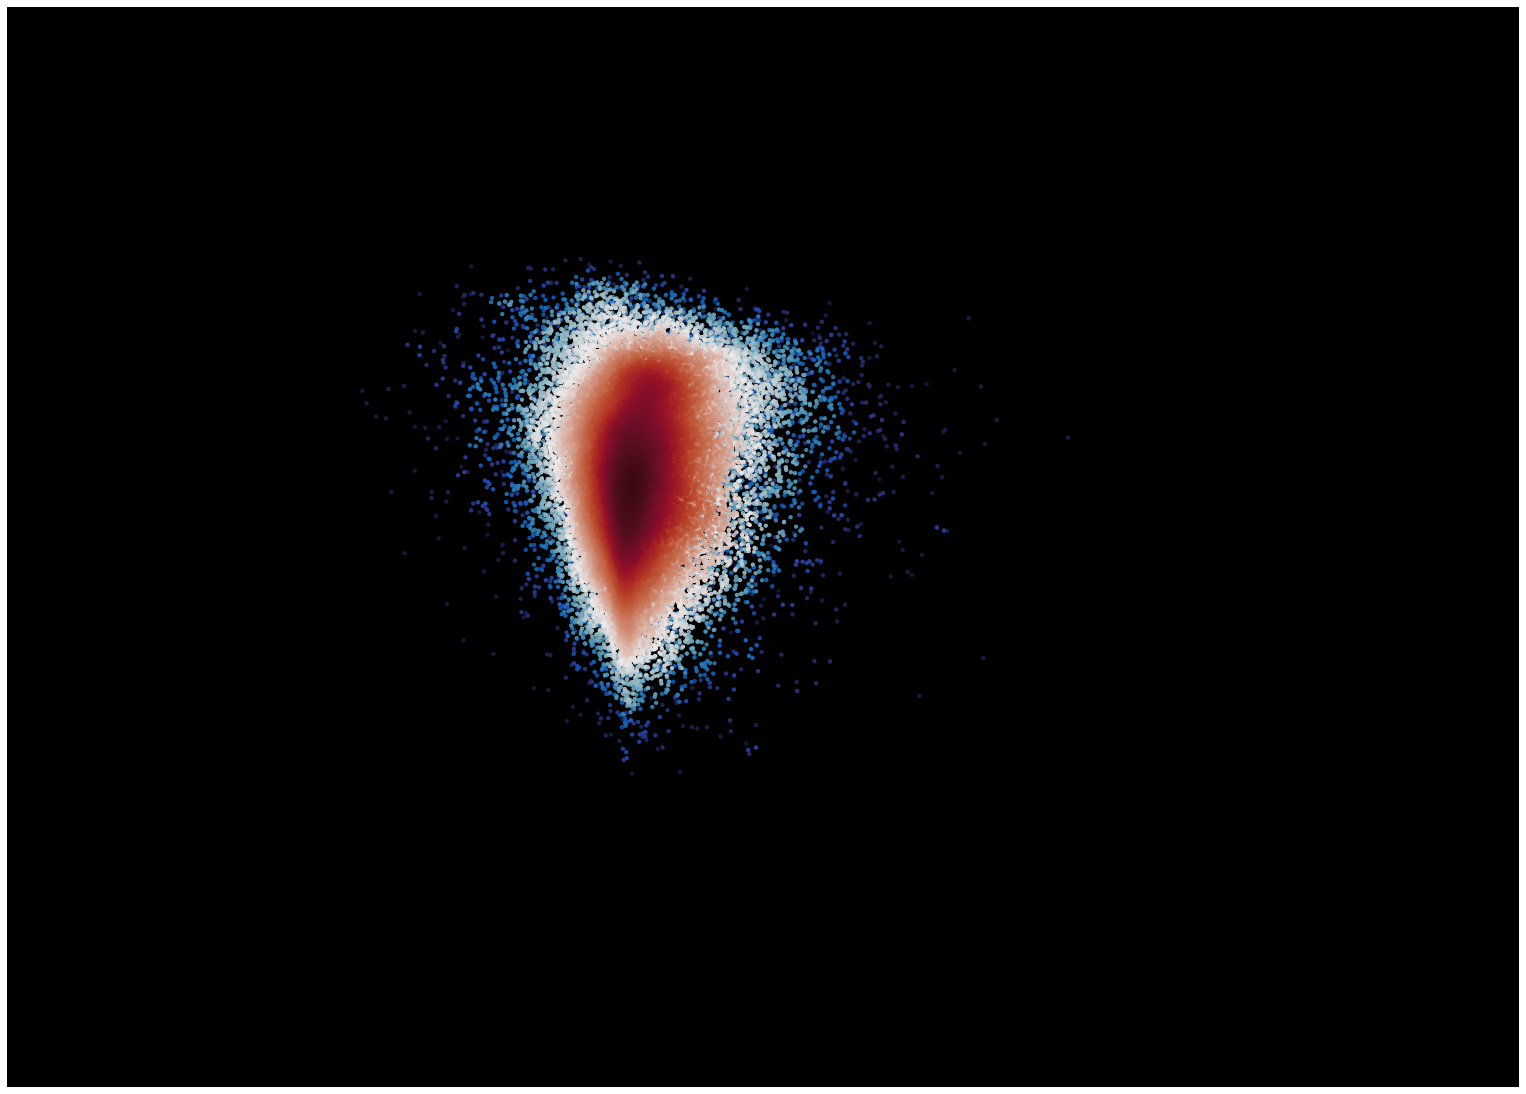

In [214]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML


fig = plt.figure(figsize=(21,15))
ax = fig.gca(projection='3d')
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)

line, = ax.plot([], [], lw=2)

nstars = 100
xs = r0[0:]
ys = p0[0:]
zs = z0[0:]
cs = L0[0:]

Cand = df_S.loc[df_S.group_id==names[1]]
x = log10(Cand.JR)
y = Cand.Jphi
z = log10(Cand.Jz)
    

# initialization function: plot the background of each frame
def init(): 
    points = ax.scatter(0, 0, 0, c='k', marker='o')
    ax.scatter(xs,ys,zs,s=10,c=cs,cmap=cmap)
    ax.scatter(x,y,z,s=10,c='g',cmap=cmap)
    ax.set_facecolor('k')
    
    plt.axis('off')
    return (points,)

# animation function. This is called sequentially
def animate(i):
    line.set_data(0,0)
    ax.view_init(elev=10., azim=30+i)
    return (line,)


# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
anim.save('test4.mp4', writer=writer)


In [140]:
# Cell for merging the shards and the actions data
df = pandas.read_csv('../data/Gaia-SDSS.csv')
df_S = pandas.read_csv('../data/GAIA_SDSS_Shards.csv')
ni = shape(df_S)[0]

new_cols = array(['JR', 'Jphi', 'Jz', 'E', 'apocentre','pericentre', 'eccent', 'zmax', 'orb_incl', 'orb_incl_deg'])
nncols = size(new_cols)
Cand_x = zeros(shape=(ni,nncols))

for i in range(0,ni):
    Cand = df_S.loc[[i]]
    fnd = around(df.X,8).isin(Cand.X) | around(df.Y,8).isin(Cand.Y)
    Cand_matched = df.loc[fnd]
    Cand_x[i,:] = Cand_matched[new_cols].values

df_new = df_S.join(pandas.DataFrame(Cand_x,columns=new_cols))
df_new = df_new[df_new.columns[1:]]
df_new.to_csv('../data/GAIA_SDSS_Shards_wActions.csv',float_format='%.8f',index=False)


In [ ]:
# Removing shards from sample
shards_ix = []
ids = []
for i in range(0,size(names)):
    namei = names[i]
    Cand = df_S.loc[df_S['group_id'] == namei]
    fnd = around(df.X,8).isin(Cand.X) | around(df.Y,8).isin(Cand.Y)
    Cand_matched = df.loc[fnd]
    shards_ix = append(shards_ix,Cand_matched.index.values)
    ids = append(ids,[namei]*shape(Cand_matched)[0])
df_shardsless = df[~df.index.isin(shards_ix)].reset_index()
df_shardsless = df_shardsless[df_shardsless.columns[1:]]
df_shardsless.to_csv('../data/GAIA_SDSS_Shardsless.csv',float_format='%.8f',index=False)